In [4]:
#import libraries
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [2]:
|#upload images
# הורדת קובץ ה-ZIP מגוגל דרייב
#https://drive.google.com/file/d/1-1QZ65R2lWBjBxaOXOXb9VxOYb83dkec/view?usp=sharing
zip_id = "1-1QZ65R2lWBjBxaOXOXb9VxOYb83dkec"
!gdown --id {zip_id} -O cats_vs_dogs.zip

# חילוץ הקבצים
!unzip cats_vs_dogs.zip -d cats_vs_dogs
print('-'*20+'\n Upload Completed!!\n'+'-'*20)

Streaming output truncated to the last 5000 lines.
  inflating: cats_vs_dogs/test/cats/cat.5675.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5532.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5564.jpg  
  inflating: cats_vs_dogs/test/cats/cat.552.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5575.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5610.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5519.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5642.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5584.jpg  
  inflating: cats_vs_dogs/test/cats/cat.563.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5529.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5623.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5527.jpg  
  inflating: cats_vs_dogs/test/cats/cat.557.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5561.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5574.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5667.jpg  
  inflating: cats_vs_dogs/test/cats/cat.5719.jpg  
  inflating: cats_vs_dogs/test/cat

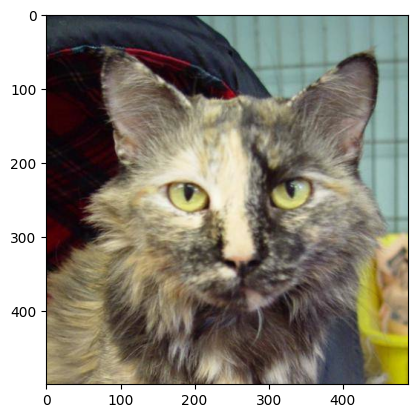

In [9]:
#show one image of tain cat (example)
img_path ='cats_vs_dogs/train/cats/cat.10.jpg'
img = load_img(img_path)
plt.imshow(img)
#plt.axis("off")

In [7]:
img.size

(489, 499)

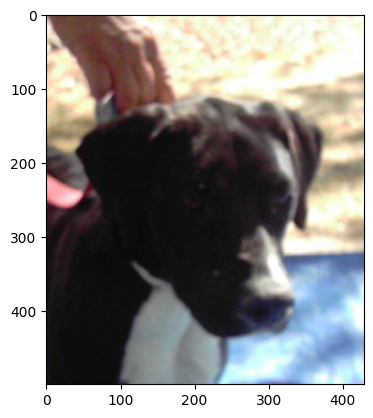

In [12]:
#show one image of tset dog
img_path ='cats_vs_dogs/test/dogs/dog.10007.jpg'
#img_path = '/content/cats_vs_dogs/test/dogs/dog.10033.jpg'
img = load_img(img_path)
plt.imshow(img)
#wha t is the image size?

In [13]:
#Use Image ImageDataGenerator to create train_datagen and test_datagen
#make sure you rescale all sets
#use a few or all of these options for the training set:
#rotation_range 30 degrees,width_shift_range 15% percent ,height_shift_range 20%,shear_range 25%,zoom_rang 17%,horizontal_flip
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range =30,
    width_shift_range = 0.15,
    height_shift_range = 0.2,
    shear_range = 0.25,
    zoom_range =0.17,
    horizontal_flip =True,
    fill_mode= 'nearest'

)

test_datagen =ImageDataGenerator(
    rescale = 1./255)


In [17]:
#define the train_path and the test_path
train_path = 'cats_vs_dogs/train'
test_path = 'cats_vs_dogs/test'


In [18]:
#use flow_from_directory to create train_generator and test_generator
#give it directory, target_sze, batch_size and class_mode (you may also want to use seed =42)
train_generator = train_datagen.flow_from_directory(
    directory  =train_path, #!!
    target_size = (150,150),
    batch_size = 64,
    class_mode = 'binary' #!!!!!!!

)

test_generator = train_datagen.flow_from_directory(
    directory  =test_path, #!!
    target_size = (150,150),
    batch_size = 64,
    class_mode = 'binary'

)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [19]:
# בעזרת המתודה class_indicies
#הדפיסו את שמות הקטגוריות
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [22]:
# Define model
model = tf.keras.Sequential ([
    tf.keras.Input(shape = (150,150,3)),
    #conv1
    tf.keras.layers.Conv2D(64,3, activation  ='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),
    #conv2
    tf.keras.layers.Conv2D(32,3, activation  ='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),
    #flatten
    tf.keras.layers.Flatten(),
    #nn
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid') #!!
])

In [28]:
# Compile model
model.compile (
    optimizer = RMSprop (learning_rate =0.001),
    loss = "binary_crossentropy",
    metrics = ['accuracy']
)

In [29]:
# Train model
history = model.fit(train_generator,epochs =5,
                    validation_data = test_generator)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 172s 526ms/step - accuracy: 0.5454 - loss: 0.7364 - val_accuracy: 0.6412 - val_loss: 0.6492
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 157s 502ms/step - accuracy: 0.6556 - loss: 0.6263 - val_accuracy: 0.6788 - val_loss: 0.5936
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 156s 499ms/step - accuracy: 0.6808 - loss: 0.5966 - val_accuracy: 0.6958 - val_loss: 0.5881
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 159s 509ms/step - accuracy: 0.7021 - loss: 0.5752 - val_accuracy: 0.7118 - val_loss: 0.5642
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 158s 506ms/step - accuracy: 0.7199 - loss: 0.5572 - val_accuracy: 0.7348 - val_loss: 0.5364


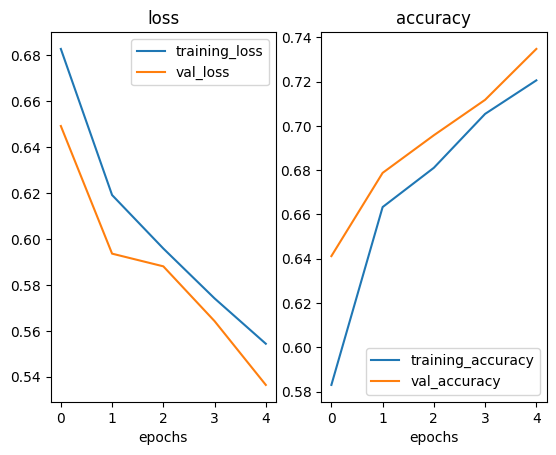

In [30]:
#plot loss and accuracy curves with subplots
#plot loss and accuracy curves with subplots
f,a =  plt.subplots(1,2)
a[0].plot(range(len(history.history['loss'])), history.history['loss'], label="training_loss")
a[0].plot(range(len(history.history['loss'])), history.history['val_loss'], label="val_loss")
a[0].set_title('loss')
a[0].set_xlabel('epochs')
a[0].legend()

# Plot Accuracy Curves
a[1].plot(range(len(history.history['loss'])), history.history['accuracy'], label="training_accuracy")
a[1].plot(range(len(history.history['loss'])), history.history['val_accuracy'], label="val_accuracy")
a[1].set_title('accuracy')
a[1].set_xlabel('epochs')
a[1].legend()

In [34]:
# בחנו את המודל עם תמונה השל כלב או חתול רנדומלי מהרשת או אם יש לכם תמונה של כלב או חתול שלכם
# הגדירו נתיב
img_path ='/content/WhatsApp Image 2025-02-26 at 20.11.39.jpeg'

#load the image from the path using load_img, make sure to give the image a target_size that will fi the model
img = load_img(img_path, target_size=(150, 150))
# convert the image with numpy array with img_to_array method
img_array = img_to_array(img)
#use np.expAnd_dims to add 1 more dim. on axis=0 tot the array
img_array = np.expand_dims(img_array, axis=0)
# normalize the result
img_array = img_array / 255.0
#predict if the image is of a cat 😈or a dog😇
prediction = model.predict(img_array)
if prediction < 0.5:
  result = '🐱‍👓'
else:
   result = '🐶'
print(result)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
🐱‍👓
[[0.14531867]]


In [35]:
model2 = tf.keras.Sequential([
    tf.keras.Input(shape=(150,150,3)),

    # conv1
    tf.keras.layers.Conv2D(64, 3, padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.MaxPooling2D(2, 2),  #  MaxPooling אחרי ReLU
    tf.keras.layers.Dropout(0.2),

    # conv2
    tf.keras.layers.Conv2D(32, 3, padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    # flatten
    tf.keras.layers.Flatten(),

    # nn
    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dropout(0.2),

    # output layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile model
model2.compile(
    optimizer=tf.keras.optimizers.RMSprop(), ##!!
    loss='binary_crossentropy',
    metrics=['accuracy']
              )
# Train model
history = model2.fit(
    train_generator,
    epochs =5,
    validation_data=test_generator
)
#plot loss and accuracy curves with subplots
f,a =  plt.subplots(1,2)
a[0].plot(range(len(history.history['loss'])), history.history['loss'], label="training_loss")
a[0].plot(range(len(history.history['loss'])), history.history['val_loss'], label="val_loss")
a[0].set_title('loss')
a[0].set_xlabel('epochs')
a[0].legend()

# Plot Accuracy Curves
a[1].plot(range(len(history.history['loss'])), history.history['accuracy'], label="training_accuracy")
a[1].plot(range(len(history.history['loss'])), history.history['val_accuracy'], label="val_accuracy")
a[1].set_title('accuracy')
a[1].set_xlabel('epochs')
a[1].legend()

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 173s 527ms/step - accuracy: 0.6217 - loss: 0.6710 - val_accuracy: 0.5068 - val_loss: 0.7894
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 157s 502ms/step - accuracy: 0.6866 - loss: 0.5805 - val_accuracy: 0.6834 - val_loss: 0.5945
Epoch 3/5
 39/313 ━━━━━━━━━━━━━━━━━━━━ 1:48 396ms/step - accuracy: 0.7226 - loss: 0.5343